In [1]:
import pandas as pd       # Data handling
import numpy as np        # Numerical computations
import seaborn as sns     # Visualization
import matplotlib.pyplot as plt  # Plotting

sns.set(style="whitegrid")


In [2]:
file_path = "tamilnadu rice.csv"  # Update with your actual file path
df = pd.read_csv(file_path)

# Display first few rows to understand structure
print("Dataset Preview:")
print(df.head())


Dataset Preview:
   Crop  Crop_Year       Season       State     Area  Production  \
0  Rice       1998  Kharif       Tamil Nadu  2386399     8215286   
1  Rice       1999  Kharif       Tamil Nadu  2204046     7225373   
2  Rice       2000  Kharif       Tamil Nadu  2113344     7217903   
3  Rice       2001  Kharif       Tamil Nadu  2059878     6583630   
4  Rice       2002  Kharif       Tamil Nadu  1516537     3577108   

   Annual_Rainfall   Fertilizer  Pesticide     Yield      pt   temp  
0           1077.1  235776221.2  692055.71  3.445000  325.16  28.55  
1            922.8  233915402.0  595092.42  3.499643  140.20  28.45  
2            971.1  207466980.5  549469.44  3.611786  306.27  28.37  
3            481.3  210375340.1  535568.28  3.532857  283.34  28.66  
4            315.9  143570557.8  379134.25  2.884643  161.97  28.93  


In [3]:
df.columns = df.columns.str.lower().str.replace(" ", "_")
print("Updated Column Names:", df.columns.tolist())


Updated Column Names: ['crop', 'crop_year', 'season', 'state', 'area', 'production', 'annual_rainfall', 'fertilizer', 'pesticide', 'yield', 'pt', 'temp']


In [4]:
tamilnadu_rice = df[(df["state"] == "Tamil Nadu") & (df["crop"] == "Rice")]
print(f"Filtered Dataset Shape: {tamilnadu_rice.shape}")


Filtered Dataset Shape: (28, 12)


In [5]:
# Check for duplicates
duplicate_count = tamilnadu_rice.duplicated().sum()
print(f"Number of duplicate rows: {duplicate_count}")

# Drop duplicates
tamilnadu_rice = tamilnadu_rice.drop_duplicates()

# Fill missing values
tamilnadu_rice = tamilnadu_rice.fillna(method='ffill')

# Verify missing values
print("Missing Values After Cleaning:\n", tamilnadu_rice.isnull().sum())


Number of duplicate rows: 0
Missing Values After Cleaning:
 crop               0
crop_year          0
season             0
state              0
area               0
production         0
annual_rainfall    0
fertilizer         0
pesticide          0
yield              0
pt                 0
temp               0
dtype: int64


C:\Users\pinna\AppData\Local\Temp\ipykernel_11120\897492255.py:9: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  tamilnadu_rice = tamilnadu_rice.fillna(method='ffill')


In [6]:
print("Statistical Summary:\n", tamilnadu_rice.describe())


Statistical Summary:
          crop_year          area    production  annual_rainfall    fertilizer  \
count    28.000000  2.800000e+01  2.800000e+01        28.000000  2.800000e+01   
mean   2010.535714  1.457926e+06  4.719369e+06       919.071429  1.957158e+08   
std       6.978709  6.941376e+05  2.355999e+06       230.553222  9.178546e+07   
min    1998.000000  2.065350e+05  8.476920e+05       315.900000  3.547445e+07   
25%    2004.750000  1.289182e+06  3.471279e+06       910.100000  1.422380e+08   
50%    2011.500000  1.757450e+06  5.050788e+06       949.700000  2.231507e+08   
75%    2017.000000  1.931448e+06  6.736754e+06       998.150000  2.473317e+08   
max    2019.000000  2.386399e+06  8.215286e+06      1364.100000  3.189199e+08   

           pesticide      yield          pt       temp  
count      28.000000  28.000000   28.000000  28.000000  
mean   388721.870357   3.695102  216.619286  28.248571  
std    191886.699445   0.519918   90.458805   1.156386  
min     76417.950000

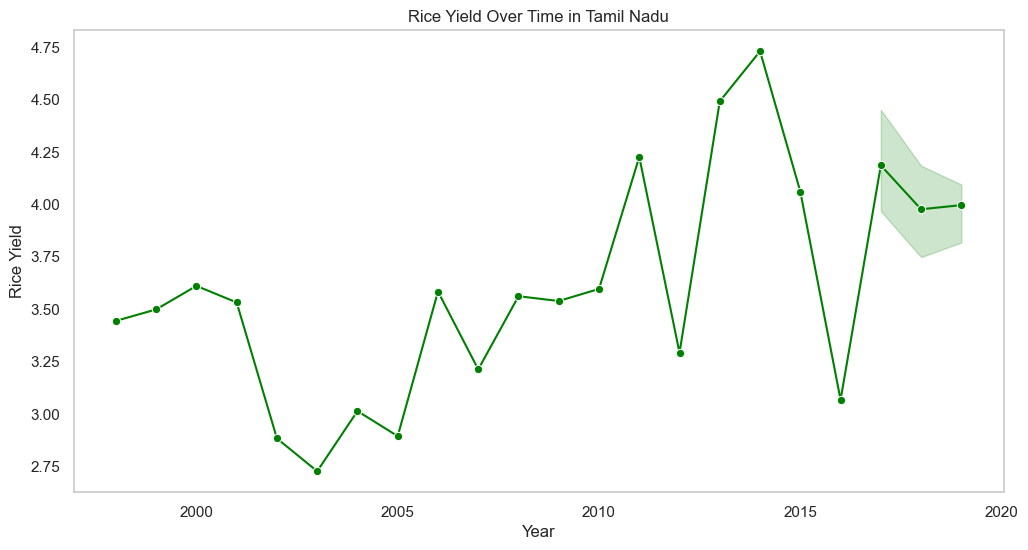

In [7]:
plt.figure(figsize=(12, 6))
sns.lineplot(x='crop_year', y='yield', data=tamilnadu_rice, marker="o", color="green")
plt.xlabel("Year")
plt.ylabel("Rice Yield")
plt.title("Rice Yield Over Time in Tamil Nadu")
plt.grid()
plt.show()


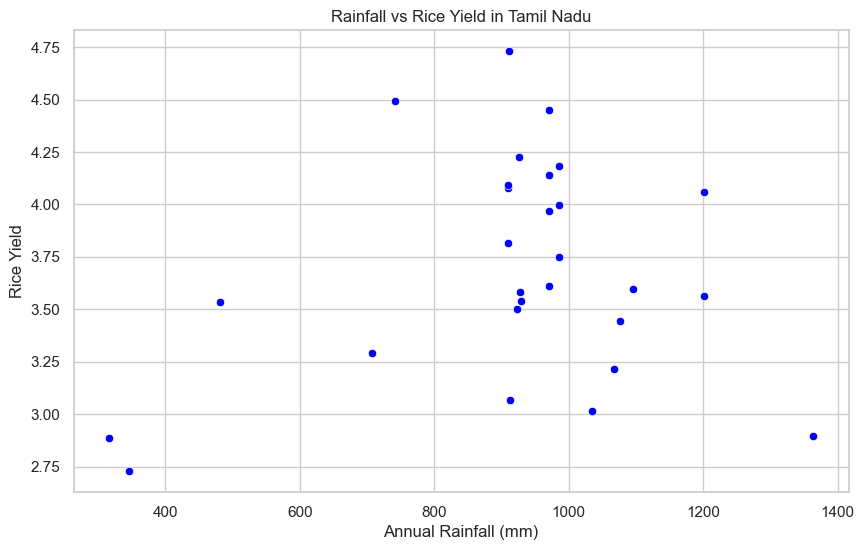

In [8]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='annual_rainfall', y='yield', data=tamilnadu_rice, color="blue")
plt.xlabel("Annual Rainfall (mm)")
plt.ylabel("Rice Yield")
plt.title("Rainfall vs Rice Yield in Tamil Nadu")
plt.show()


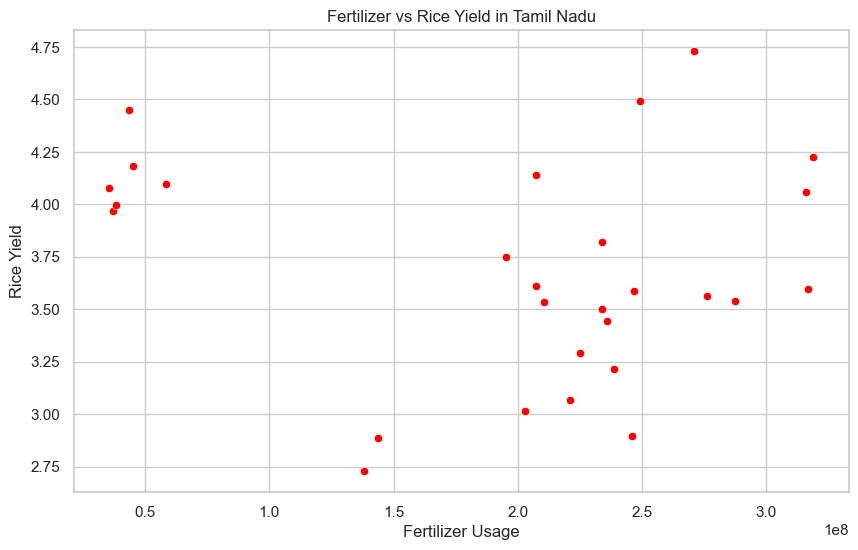

In [9]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='fertilizer', y='yield', data=tamilnadu_rice, color="red")
plt.xlabel("Fertilizer Usage")
plt.ylabel("Rice Yield")
plt.title("Fertilizer vs Rice Yield in Tamil Nadu")
plt.show()


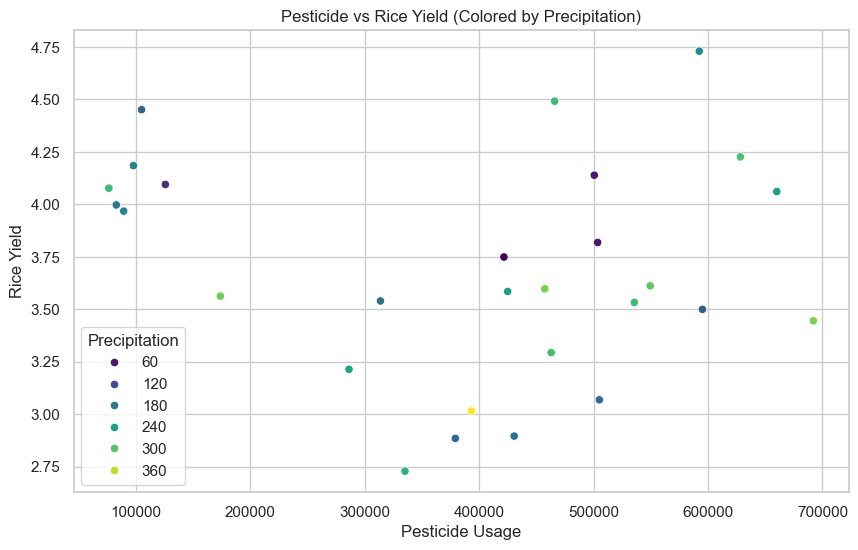

In [10]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='pesticide', y='yield', hue='pt', data=tamilnadu_rice, palette="viridis")
plt.xlabel("Pesticide Usage")
plt.ylabel("Rice Yield")
plt.title("Pesticide vs Rice Yield (Colored by Precipitation)")
plt.legend(title="Precipitation")
plt.show()


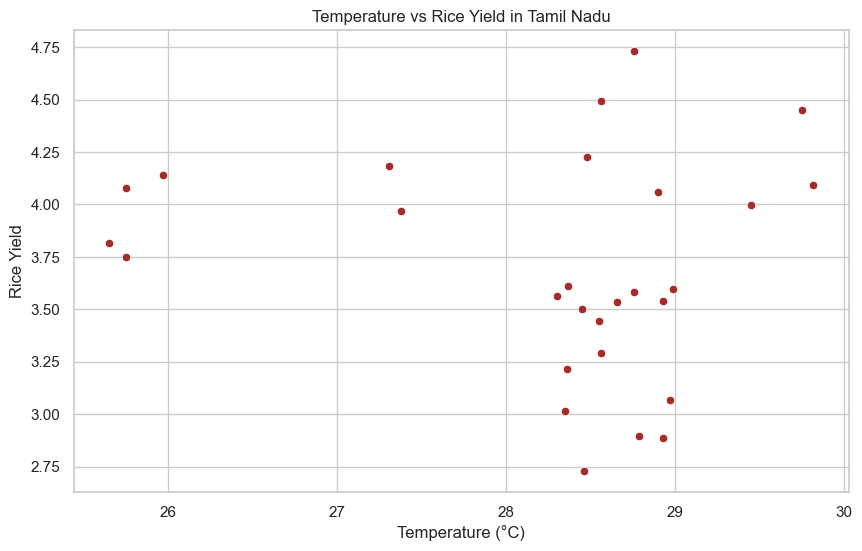

In [11]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='temp', y='yield', data=tamilnadu_rice, color="brown")
plt.xlabel("Temperature (°C)")
plt.ylabel("Rice Yield")
plt.title("Temperature vs Rice Yield in Tamil Nadu")
plt.show()


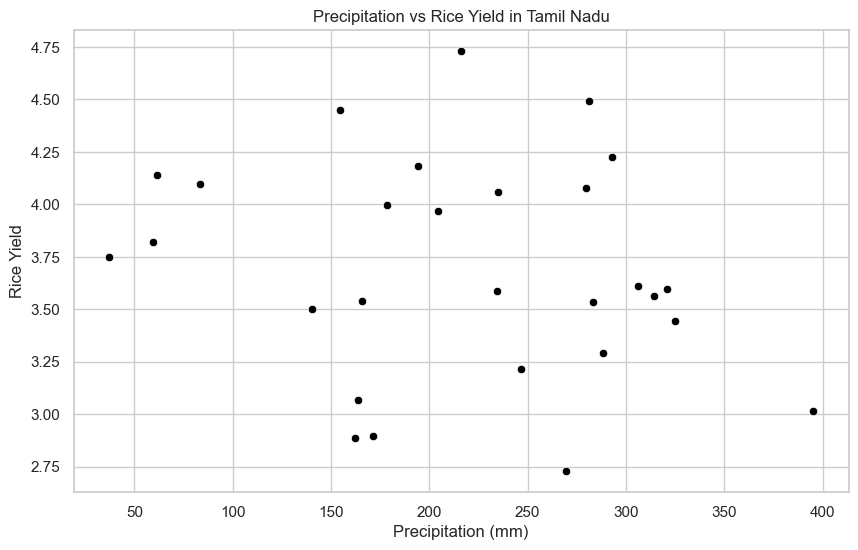

In [12]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='pt', y='yield', data=tamilnadu_rice, color="black")
plt.xlabel("Precipitation (mm)")
plt.ylabel("Rice Yield")
plt.title("Precipitation vs Rice Yield in Tamil Nadu")
plt.show()


In [13]:
correlation_matrix = tamilnadu_rice[['yield', 'annual_rainfall', 'fertilizer', 'pt', 'temp']].corr()
print("Correlation Matrix:\n", correlation_matrix)


Correlation Matrix:
                     yield  annual_rainfall  fertilizer        pt      temp
yield            1.000000         0.209907   -0.166552 -0.198072 -0.133948
annual_rainfall  0.209907         1.000000    0.217839 -0.001398 -0.052880
fertilizer      -0.166552         0.217839    1.000000  0.255883  0.106576
pt              -0.198072        -0.001398    0.255883  1.000000  0.301804
temp            -0.133948        -0.052880    0.106576  0.301804  1.000000


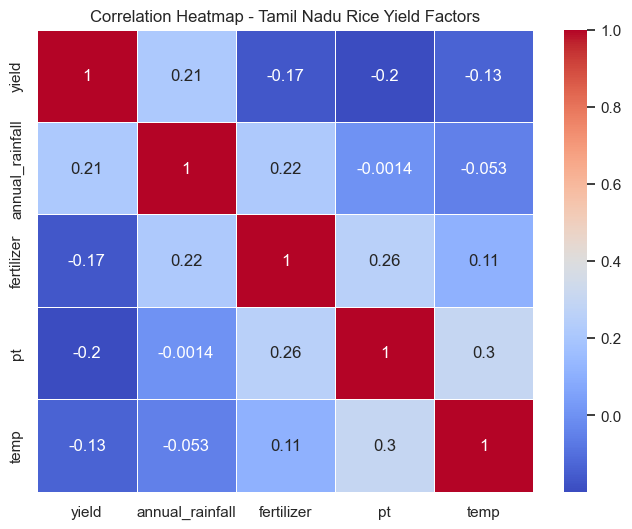

In [14]:
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Heatmap - Tamil Nadu Rice Yield Factors")
plt.show()


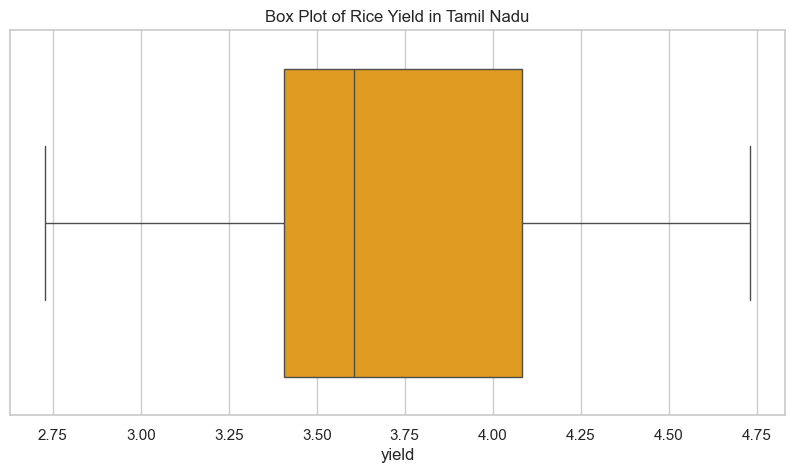

In [15]:
plt.figure(figsize=(10, 5))
sns.boxplot(x=tamilnadu_rice['yield'], color="orange")
plt.title("Box Plot of Rice Yield in Tamil Nadu")
plt.show()


In [16]:
tamilnadu_rice['fert_temp'] = tamilnadu_rice['fertilizer'] * tamilnadu_rice['temp']
tamilnadu_rice['fert_precip'] = tamilnadu_rice['fertilizer'] * tamilnadu_rice['pt']
tamilnadu_rice['temp_precip'] = tamilnadu_rice['temp'] * tamilnadu_rice['pt']

# Squared terms
tamilnadu_rice['fert_sq'] = tamilnadu_rice['fertilizer'] ** 2
tamilnadu_rice['temp_sq'] = tamilnadu_rice['temp'] ** 2
tamilnadu_rice['precip_sq'] = tamilnadu_rice['pt'] ** 2


In [17]:
print("Data Types:\n", tamilnadu_rice.dtypes)

# Ensure yield is numeric
tamilnadu_rice['yield'] = pd.to_numeric(tamilnadu_rice['yield'], errors='coerce')

# Filter numeric columns
tamilnadu_rice = tamilnadu_rice.select_dtypes(include=[np.number])


Data Types:
 crop                object
crop_year            int64
season              object
state               object
area                 int64
production           int64
annual_rainfall    float64
fertilizer         float64
pesticide          float64
yield              float64
pt                 float64
temp               float64
fert_temp          float64
fert_precip        float64
temp_precip        float64
fert_sq            float64
temp_sq            float64
precip_sq          float64
dtype: object


In [18]:
correlation_matrix = tamilnadu_rice.corr()
print("Correlation with Yield:\n", correlation_matrix['yield'].sort_values(ascending=False))


Correlation with Yield:
 yield              1.000000
crop_year          0.618942
annual_rainfall    0.209907
fert_sq           -0.035846
production        -0.046639
temp_sq           -0.127373
pesticide         -0.128249
temp              -0.133948
fertilizer        -0.166552
fert_temp         -0.175732
fert_precip       -0.176294
pt                -0.198072
temp_precip       -0.207313
precip_sq         -0.216293
area              -0.394736
Name: yield, dtype: float64
